# ch2. matplotlib histogram, scatter plot, boxplot
이번 챕터에서는 지난 챕터에 이어서 matplotlib을 이용하여 histogram, scatterplot, boxplot을 그리는 방법을 알아보겠습니다. 실제로 데이터 셋의 분포를 확인할 때 많이 사용하는 기법들이니, 잘 익히고 넘어갔으면 좋겠습니다.

## matplotlib histogram
### histogram 그리기
히스토그램은 x축을 같은 크기의 여러 구간으로 나누고, 각 구간에 속하는 데이터 값의 개수를 y 축에 표시합니다. 주로 키나 몸무게 같은 연속형 확률 변수들을 히스토그램으로 많이 시각화 합니다.

In [1]:
import pandas as pd

df = pd.read_csv("./data/diamonds.csv")

In [3]:
df = df.drop(["Unnamed: 0"], axis=1)

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: >

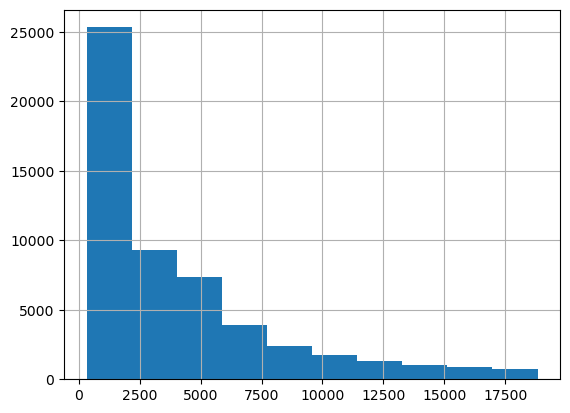

In [6]:
df["price"].hist()

### histogram bins 설정
구간을 나누는 bins를 직접 설정하여 더 잘게 나누거나 더 큰 단위로 뭉칠 수 있습니다.

Text(0.5, 0, 'Price')

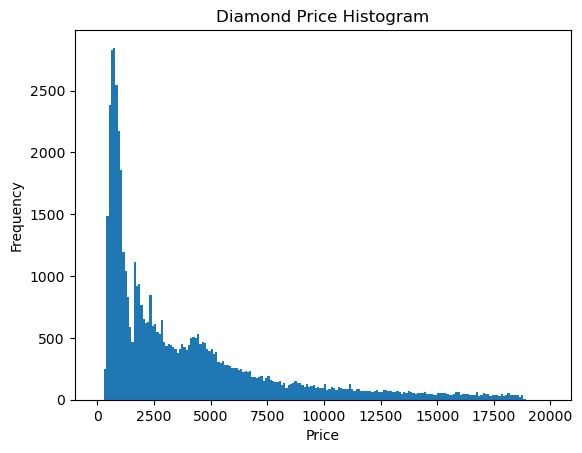

In [8]:
import numpy as np
from matplotlib import pyplot as plt

df["price"].plot(
    kind="hist",
    bins=np.arange(0,20000,100)
)
plt.title("Diamond Price Histogram")
plt.xlabel("Price")

### 여러 히스토그램 겹쳐서 그리기
히스토그램을 이용해 다이아몬드의 가로, 세로, 높이 분포를 시각화 해보겠습니다.  

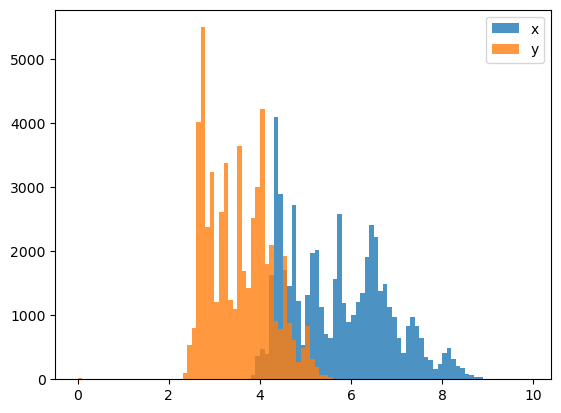

In [17]:
bins = np.arange(0,10,0.1)
_= plt.hist(df["x"], bins=bins, alpha=0.8, label ="x")
_= plt.hist(df["z"], bins=bins, alpha=0.8, label ="y")
plt.legend()

히스토그램을 이용해서 다이아몬드의 가로와 세로 길이는 거의 비슷한 분포를 띄지만, 높이는 분포가 다르다는 것을 확인할 수 있었습니다.

## Scatterplot
scatter plot은 서로 다른 두 연속형 확률 변수의 관계를 시각화 할 때 사용합니다. scatter plot을 이용해서 다이아몬드 가격과 상관관계가 있을 법한 요소들을 한번 그려보겠습니다. 산포도는 모든 데이터 샘플을 그리기 때문에 편의를 위해서 일부만 샘플링하여 그려보겠습니다.

<Axes: xlabel='carat', ylabel='price'>

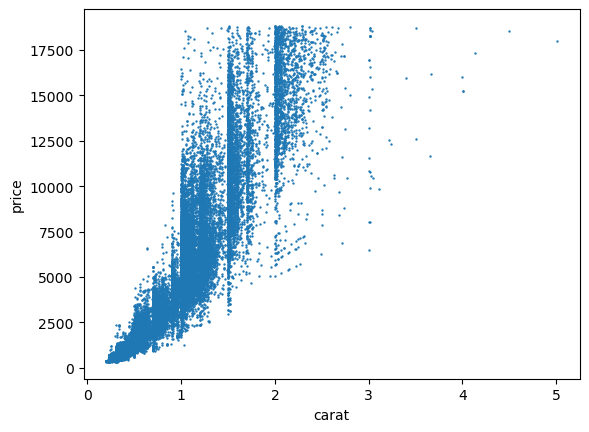

In [20]:
df.plot(kind="scatter", x="carat", y="price", s=0.5)

<Axes: xlabel='carat', ylabel='price'>

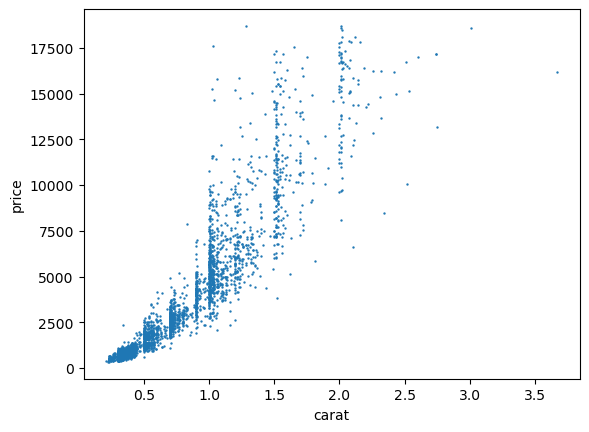

In [28]:
sampled_df = df.sample(3000)
sampled_df.plot(kind="scatter", x="carat", y="price", s=0.5)

In [29]:
# 양의 상관관계

scatter plot을 통해서 다이아몬드의 가격과 캐럿(무게) 사이에 뚜렷한 양의 상관관계가 있음을 확인할 수 있었습니다. 다음 챕터에서 다룰 seaborn을 이용하면 여러 변수 조합들에 대한 scatter plot을 손쉽게 그릴 수 있습니다.

## BoxPlot
### boxplot 개념
데이터의 분포를 파악할 때 요긴하게 사용되는 plot 중에 하나입니다. boxplot은 데이터 셋의 최대, 최소값, 중앙값, 전반적인 분포와 outlier의 분포를 확인하기 위해서 많이 사용됩니다. 개념을 설명드리기에 앞서서 한번 그려보겠습니다.

In [34]:
# 박스 플랏은 면접 문제로 자주 나옴

{'whiskers': [<matplotlib.lines.Line2D at 0x2124e478710>,
 'caps': [<matplotlib.lines.Line2D at 0x2124e4837d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21248bca290>],
 'medians': [<matplotlib.lines.Line2D at 0x2124e484490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2124e483010>],
 'means': []}

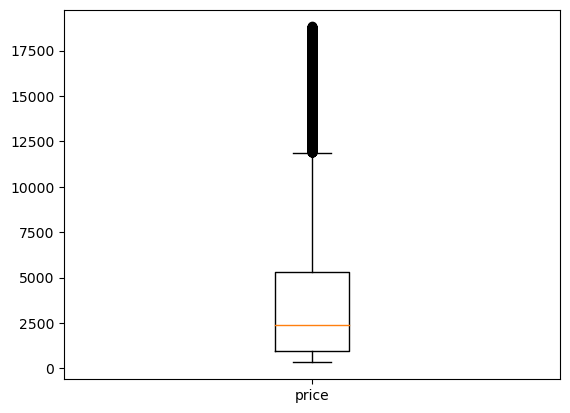

In [33]:
plt.boxplot(df["price"], labels=["price"])

가운데 박스가 그려져 있고, 위 아래로 선아 그어져 있습니다. 그리고 선 위쪽으로 원들이 보입니다.

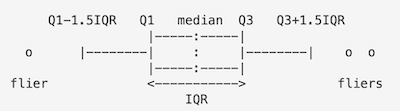

boxplot을 이해하기 위해서는 먼저 4분위수(quantile)를 이해해야 합니다. 4 분위 수란 데이터를 크기 순으로 정렬 한 뒤, 4등분을 나누어 25% 지점, 50% 지점, 75% 지점, 100% 지점에 해당하는 자료를 가져온 것입니다. 만일 5등분을 했다면 5분위수, 6등분을 했다면 6분위 수가 됩니다.

boxplot 1분위 수부터 3분위 수까지 범위를 박스로 그려줍니다. 그리고 2분위 수, 중간 값은 노란색 선으로 표시해줍니다. 박스의 길이는 IQR이라고 부릅니다.

$$IQR=Q3-Q1$$

boxplot에서 박스 위아래로 그어진 선은 IQR을 이용해서 계산된 값입니다. 위쪽으로는 Q3 + 1.5 * IQR, 아래쪽으로는 Q1 - 1.5. IQR입니다. 이 최대 최솟값을 벗어나는 데이터는 outlier로 간주되어 원으로 표시됩니다.

앞서 그린 다이아몬드 가격 boxplot을 다시 살펴보겠습니다. 다이아 가격은 대략 1000달러에서 5000 달러 사이에 분포하고 있고, 중간 값은 2000달러 정도입니다. 그리고 최대값 위쪽으로 outlier들이 집계되는 것으로 보아 다이아몬드 가격은 고가품일 수록 가격이 급격하게 늘어난다는걸 알 수 있습니다.

### boxplot 여러개 그리기
하나의 그래프에 여러 boxplot을 그릴 수 있습니다. 이전에 bar, line chart를 그리는 방식이랑 약간 다릅니다.

Text(0.5, 1.0, 'Diamond XYZ')

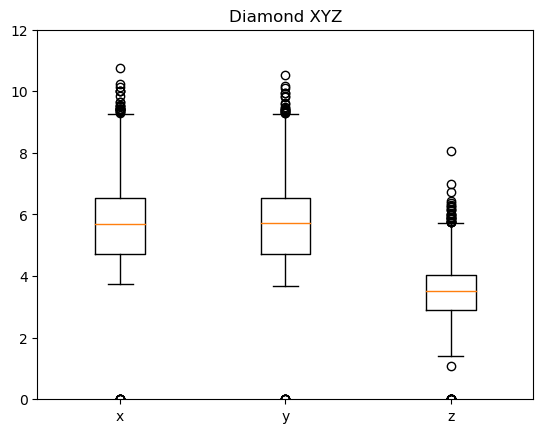

In [38]:
_= plt.boxplot(df[["x","y","z"]], labels=["x","y","z"])
plt.ylim(0,12) # y축 값 제한하기
plt.title("Diamond XYZ")

히스토그램을 통해서 파악했던 것과 유사하게 x와 y 값은 분포가 비슷하고, z 값은 분포가 다르다는 것을 알 수 있습니다. 그리고 주로 최댓값보다 큰 outlier들이 존재하며, 최소값보다 작은 outlier로는 0값들이 있다는 것을 확인할 수 있습니다. 이를 통해 모델을 학습하기 전에 어떤 데이터를 전처리 해주어야 하는지 파악할 수 있습니다.

### 가로로 boxplot 그리기
vert 옵션을 적용하면 boxplot을 가로로 그릴 수도 있습니다.

Text(0.5, 1.0, 'Diamond XYZ')

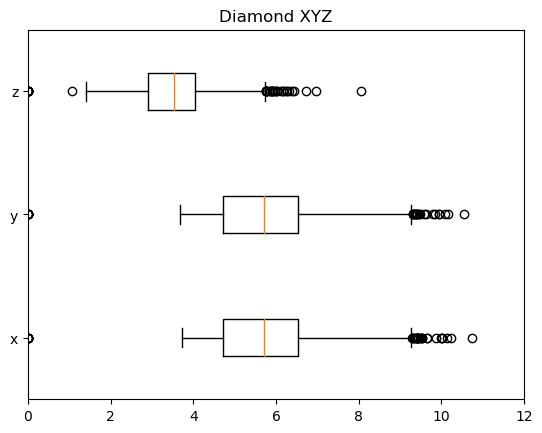

In [40]:
_= plt.boxplot(df[["x","y","z"]], labels=["x","y","z"], vert=False)
plt.xlim(0,12) # y축 값 제한하기
plt.title("Diamond XYZ")

## 정리
이번 챕터에서는 matplotlib의 histogram, scatter plot, boxplot의 사용법과 개념에 대해서 알아봤습니다. 실제로 데이터의 특징을 파악할 때 많이 사용되는 기법이기도 하고, 면접에 단골 질문으로 등장하는 것들입니다. 아래 질문들에 대한 답변을 스스로 한번 생각해보고 넘어가면 좋겠습니다.

- histogram을 그려야하는 상황은 어떤 것들이 있을까요?
- scatter plot을 통해 확인해야하는 요소들은 어떤 것이 있을까요?
- boxplot을 구성하는 각 요소들을 설명해주세요
- boxplot에서 box를 벗어나 표시되는 값들은 무엇이고, 어떻게 해야할까요?